In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from PIL import Image
import numpy as np
import os

In [2]:
def train_CNN(train_directory,target_size=(200,200), classes=None,
              batch_size=128,num_epochs=20,num_classes=5,verbose=0):
    
    # ImageDataGenerator object instance with scaling
    train_datagen = ImageDataGenerator(rescale=1/255)

    # Flow training images in batches using the generator
    train_generator = train_datagen.flow_from_directory(
            train_directory,  # This is the source directory for training images
            target_size=target_size,  # All images will be resized to 200 x 200
            batch_size=batch_size,
            # Specify the classes explicitly
            classes = classes,
            # Since we use categorical_crossentropy loss, we need categorical labels
            class_mode='categorical')
    
    input_shape = tuple(list(target_size)+[3])
    
    # Model architecture
    model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 200x 200 with 3 bytes color
    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 512 neuron in the fully-connected layer
    tf.keras.layers.Dense(512, activation='relu'),
    # 5 output neurons for 5 classes with the softmax activation
    tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    
    # Optimizer and compilation
    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])
    
    # Total sample count
    total_sample=train_generator.n
    
    # Training
    model.fit_generator(
        train_generator, 
        steps_per_epoch=int(total_sample/batch_size),  
        epochs=num_epochs,
        verbose=verbose)
    
    return model

In [3]:
train_directory = "train_dataset/"
n_epochs = 20
classes = os.listdir("train_dataset")
num_classes=len(classes)

In [4]:
trained_model=train_CNN(train_directory=train_directory,classes=classes,num_epochs=n_epochs,
                        num_classes=num_classes,verbose=1)

Found 7330 images belonging to 14 classes.
Epoch 1/20


/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:802: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


 8/57 [===>..........................] - ETA: 6:50 - loss: 3.1818 - acc: 0.0871

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:802: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


17/57 [=======>......................] - ETA: 5:22 - loss: 2.7635 - acc: 0.1311

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


26/57 [============>.................] - ETA: 4:08 - loss: 2.5973 - acc: 0.1611

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


36/57 [=================>............] - ETA: 2:47 - loss: 2.4935 - acc: 0.1814

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


57/57 [==============================] - 443s 8s/step - loss: 2.3639 - acc: 0.2165
Epoch 2/20


/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


 1/57 [..............................] - ETA: 10:32 - loss: 2.1406 - acc: 0.2500

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:802: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


13/57 [=====>........................] - ETA: 6:16 - loss: 1.9755 - acc: 0.3005

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


14/57 [======>.......................] - ETA: 6:05 - loss: 1.9630 - acc: 0.3075

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


15/57 [======>.......................] - ETA: 5:55 - loss: 1.9484 - acc: 0.3120

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


39/57 [===================>..........] - ETA: 2:25 - loss: 1.9060 - acc: 0.3367

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:802: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


45/57 [======================>.......] - ETA: 1:36 - loss: 1.8941 - acc: 0.3408

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


57/57 [==============================] - 446s 8s/step - loss: 1.8627 - acc: 0.3489
Epoch 3/20
 2/57 [>.............................] - ETA: 8:37 - loss: 1.8672 - acc: 0.3281

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


15/57 [======>.......................] - ETA: 5:49 - loss: 1.7265 - acc: 0.4036

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


20/57 [=========>....................] - ETA: 4:52 - loss: 1.7541 - acc: 0.4043

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:802: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


27/57 [=============>................] - ETA: 3:55 - loss: 1.7242 - acc: 0.4117

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


37/57 [==================>...........] - ETA: 2:36 - loss: 1.7067 - acc: 0.4158

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


42/57 [=====================>........] - ETA: 1:57 - loss: 1.6975 - acc: 0.4152

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


48/57 [========================>.....] - ETA: 1:10 - loss: 1.6934 - acc: 0.4195

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:802: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


57/57 [==============================] - 440s 8s/step - loss: 1.7015 - acc: 0.4181
Epoch 4/20
 4/57 [=>............................] - ETA: 8:01 - loss: 1.5942 - acc: 0.4473

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


 8/57 [===>..........................] - ETA: 6:55 - loss: 1.5498 - acc: 0.4785

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


13/57 [=====>........................] - ETA: 6:07 - loss: 1.5059 - acc: 0.4808

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:802: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


17/57 [=======>......................] - ETA: 5:28 - loss: 1.5394 - acc: 0.4724

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


23/57 [===========>..................] - ETA: 4:36 - loss: 1.5349 - acc: 0.4749

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


27/57 [=============>................] - ETA: 4:02 - loss: 1.5594 - acc: 0.4641

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:802: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


33/57 [================>.............] - ETA: 3:12 - loss: 1.5338 - acc: 0.4725

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


57/57 [==============================] - 439s 8s/step - loss: 1.5234 - acc: 0.4731
Epoch 5/20
 4/57 [=>............................] - ETA: 7:05 - loss: 1.3127 - acc: 0.5566

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


14/57 [======>.......................] - ETA: 5:50 - loss: 1.4083 - acc: 0.5145

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


21/57 [==========>...................] - ETA: 4:48 - loss: 1.4526 - acc: 0.4989

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


28/57 [=============>................] - ETA: 3:50 - loss: 1.4530 - acc: 0.4922

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:802: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


29/57 [==============>...............] - ETA: 3:42 - loss: 1.4511 - acc: 0.4925

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


35/57 [=================>............] - ETA: 2:51 - loss: 1.4506 - acc: 0.4950

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:802: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


57/57 [==============================] - 442s 8s/step - loss: 1.4390 - acc: 0.5015
Epoch 6/20
 4/57 [=>............................] - ETA: 6:15 - loss: 1.3175 - acc: 0.5352

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


11/57 [====>.........................] - ETA: 6:16 - loss: 1.3186 - acc: 0.5270

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


26/57 [============>.................] - ETA: 4:07 - loss: 1.3293 - acc: 0.5373

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:802: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


29/57 [==============>...............] - ETA: 3:43 - loss: 1.3482 - acc: 0.5296

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


34/57 [================>.............] - ETA: 2:59 - loss: 1.3568 - acc: 0.5247

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


39/57 [===================>..........] - ETA: 2:20 - loss: 1.3435 - acc: 0.5290

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:802: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


40/57 [====================>.........] - ETA: 2:12 - loss: 1.3442 - acc: 0.5283

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


57/57 [==============================] - 442s 8s/step - loss: 1.3495 - acc: 0.5310
Epoch 7/20
 7/57 [==>...........................] - ETA: 7:22 - loss: 1.2992 - acc: 0.5402

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:802: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


13/57 [=====>........................] - ETA: 6:12 - loss: 1.2621 - acc: 0.5541

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


14/57 [======>.......................] - ETA: 6:01 - loss: 1.2698 - acc: 0.5513

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


17/57 [=======>......................] - ETA: 5:32 - loss: 1.3175 - acc: 0.5340

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:802: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


37/57 [==================>...........] - ETA: 2:37 - loss: 1.2801 - acc: 0.5545

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


39/57 [===================>..........] - ETA: 2:21 - loss: 1.2749 - acc: 0.5563

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


41/57 [====================>.........] - ETA: 2:06 - loss: 1.2697 - acc: 0.5574

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


57/57 [==============================] - 446s 8s/step - loss: 1.2725 - acc: 0.5586
Epoch 8/20
15/57 [======>.......................] - ETA: 5:18 - loss: 1.2916 - acc: 0.5668

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:802: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


23/57 [===========>..................] - ETA: 4:21 - loss: 1.2743 - acc: 0.5653

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


24/57 [===========>..................] - ETA: 4:13 - loss: 1.2720 - acc: 0.5658

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:802: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


26/57 [============>.................] - ETA: 3:58 - loss: 1.2611 - acc: 0.5699

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


27/57 [=============>................] - ETA: 3:50 - loss: 1.2591 - acc: 0.5705

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


33/57 [================>.............] - ETA: 3:05 - loss: 1.2387 - acc: 0.5705

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


34/57 [================>.............] - ETA: 2:57 - loss: 1.2483 - acc: 0.5674

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


35/57 [=================>............] - ETA: 2:49 - loss: 1.2418 - acc: 0.5691

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


57/57 [==============================] - 438s 8s/step - loss: 1.2069 - acc: 0.5805
Epoch 9/20
 8/57 [===>..........................] - ETA: 6:10 - loss: 1.1801 - acc: 0.5771

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:802: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


13/57 [=====>........................] - ETA: 5:49 - loss: 1.1886 - acc: 0.5823

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


16/57 [=======>......................] - ETA: 5:11 - loss: 1.1958 - acc: 0.5839

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


25/57 [============>.................] - ETA: 4:05 - loss: 1.1619 - acc: 0.5998

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:802: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


28/57 [=============>................] - ETA: 3:43 - loss: 1.1441 - acc: 0.6049

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


44/57 [======================>.......] - ETA: 1:40 - loss: 1.1347 - acc: 0.6101

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


57/57 [==============================] - 437s 8s/step - loss: 1.1299 - acc: 0.6118
Epoch 10/20
11/57 [====>.........................] - ETA: 6:03 - loss: 1.1738 - acc: 0.5923

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


13/57 [=====>........................] - ETA: 5:46 - loss: 1.1620 - acc: 0.6004

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:802: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


17/57 [=======>......................] - ETA: 5:10 - loss: 1.1183 - acc: 0.6140

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:802: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


19/57 [=========>....................] - ETA: 4:55 - loss: 1.0975 - acc: 0.6250

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


28/57 [=============>................] - ETA: 3:42 - loss: 1.0725 - acc: 0.6301

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


31/57 [===============>..............] - ETA: 3:20 - loss: 1.0892 - acc: 0.6255

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


36/57 [=================>............] - ETA: 2:42 - loss: 1.0745 - acc: 0.6316

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


39/57 [===================>..........] - ETA: 2:20 - loss: 1.0610 - acc: 0.6341

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


57/57 [==============================] - 445s 8s/step - loss: 1.0592 - acc: 0.6347
Epoch 11/20
10/57 [====>.........................] - ETA: 5:52 - loss: 1.0817 - acc: 0.6305

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


19/57 [=========>....................] - ETA: 4:59 - loss: 1.0883 - acc: 0.6242

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:802: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


20/57 [=========>....................] - ETA: 4:51 - loss: 1.0708 - acc: 0.6305

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


23/57 [===========>..................] - ETA: 4:29 - loss: 1.0521 - acc: 0.6318

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


38/57 [===================>..........] - ETA: 2:30 - loss: 0.9984 - acc: 0.6513

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


41/57 [====================>.........] - ETA: 2:06 - loss: 0.9987 - acc: 0.6534

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


46/57 [=======================>......] - ETA: 1:26 - loss: 0.9824 - acc: 0.6595

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:802: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


52/57 [==========================>...] - ETA: 39s - loss: 0.9769 - acc: 0.6612

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


57/57 [==============================] - 444s 8s/step - loss: 0.9702 - acc: 0.6629
Epoch 12/20
10/57 [====>.........................] - ETA: 5:30 - loss: 0.9804 - acc: 0.6609

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


11/57 [====>.........................] - ETA: 5:41 - loss: 0.9799 - acc: 0.6584

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


21/57 [==========>...................] - ETA: 4:41 - loss: 0.9586 - acc: 0.6696

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


22/57 [==========>...................] - ETA: 4:33 - loss: 0.9576 - acc: 0.6673

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:802: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


27/57 [=============>................] - ETA: 3:49 - loss: 0.9338 - acc: 0.6701

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:802: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


29/57 [==============>...............] - ETA: 3:34 - loss: 0.9379 - acc: 0.6697

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


57/57 [==============================] - 443s 8s/step - loss: 0.8948 - acc: 0.6912
Epoch 13/20


/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


11/57 [====>.........................] - ETA: 5:26 - loss: 0.8265 - acc: 0.7038

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


12/57 [=====>........................] - ETA: 5:36 - loss: 0.8193 - acc: 0.7083

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


27/57 [=============>................] - ETA: 3:48 - loss: 0.7919 - acc: 0.7198

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


29/57 [==============>...............] - ETA: 3:34 - loss: 0.7887 - acc: 0.7203

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


35/57 [=================>............] - ETA: 2:49 - loss: 0.8129 - acc: 0.7143

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:802: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


36/57 [=================>............] - ETA: 2:41 - loss: 0.8072 - acc: 0.7167

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:802: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


57/57 [==============================] - 443s 8s/step - loss: 0.8005 - acc: 0.7172
Epoch 14/20


/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


13/57 [=====>........................] - ETA: 5:35 - loss: 0.6893 - acc: 0.7566

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:802: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


14/57 [======>.......................] - ETA: 5:39 - loss: 0.6745 - acc: 0.7651

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


20/57 [=========>....................] - ETA: 4:55 - loss: 0.7415 - acc: 0.7437

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


24/57 [===========>..................] - ETA: 4:23 - loss: 0.7277 - acc: 0.7477

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:802: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


30/57 [==============>...............] - ETA: 3:35 - loss: 0.7351 - acc: 0.7453

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


54/57 [===========================>..] - ETA: 23s - loss: 0.7163 - acc: 0.7539

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


57/57 [==============================] - 451s 8s/step - loss: 0.7107 - acc: 0.7560
Epoch 15/20
18/57 [========>.....................] - ETA: 5:07 - loss: 0.6588 - acc: 0.7869

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


22/57 [==========>...................] - ETA: 4:36 - loss: 0.6863 - acc: 0.7766

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


24/57 [===========>..................] - ETA: 4:20 - loss: 0.6769 - acc: 0.7794

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:802: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


27/57 [=============>................] - ETA: 3:56 - loss: 0.6666 - acc: 0.7829

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


34/57 [================>.............] - ETA: 3:00 - loss: 0.6431 - acc: 0.7924

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


41/57 [====================>.........] - ETA: 2:05 - loss: 0.6295 - acc: 0.7945

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


46/57 [=======================>......] - ETA: 1:25 - loss: 0.6304 - acc: 0.7932

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


53/57 [==========================>...] - ETA: 31s - loss: 0.6466 - acc: 0.7881

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:802: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


57/57 [==============================] - 444s 8s/step - loss: 0.6443 - acc: 0.7873
Epoch 16/20
14/57 [======>.......................] - ETA: 5:14 - loss: 0.5845 - acc: 0.8125

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


15/57 [======>.......................] - ETA: 5:19 - loss: 0.5881 - acc: 0.8120

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


17/57 [=======>......................] - ETA: 5:14 - loss: 0.5732 - acc: 0.8162

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


24/57 [===========>..................] - ETA: 4:21 - loss: 0.5647 - acc: 0.8161

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:802: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


25/57 [============>.................] - ETA: 4:13 - loss: 0.5718 - acc: 0.8150

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


30/57 [==============>...............] - ETA: 3:30 - loss: 0.5620 - acc: 0.8150

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


39/57 [===================>..........] - ETA: 2:20 - loss: 0.5571 - acc: 0.8146

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


45/57 [======================>.......] - ETA: 1:33 - loss: 0.5461 - acc: 0.8170

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:802: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


57/57 [==============================] - 445s 8s/step - loss: 0.5458 - acc: 0.8176
Epoch 17/20
26/57 [============>.................] - ETA: 4:00 - loss: 0.4898 - acc: 0.8398

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


33/57 [================>.............] - ETA: 3:05 - loss: 0.4918 - acc: 0.8376

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


34/57 [================>.............] - ETA: 2:58 - loss: 0.5007 - acc: 0.8352

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


38/57 [===================>..........] - ETA: 2:27 - loss: 0.5003 - acc: 0.8361

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


48/57 [========================>.....] - ETA: 1:08 - loss: 0.4950 - acc: 0.8359

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:802: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


51/57 [=========================>....] - ETA: 45s - loss: 0.4861 - acc: 0.8391

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


56/57 [============================>.] - ETA: 7s - loss: 0.4722 - acc: 0.8448 

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:802: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


57/57 [==============================] - 437s 8s/step - loss: 0.4727 - acc: 0.8439
Epoch 18/20
16/57 [=======>......................] - ETA: 4:57 - loss: 0.4988 - acc: 0.8306

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


33/57 [================>.............] - ETA: 3:07 - loss: 0.4269 - acc: 0.8582

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


38/57 [===================>..........] - ETA: 2:28 - loss: 0.4405 - acc: 0.8544

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


40/57 [====================>.........] - ETA: 2:12 - loss: 0.4308 - acc: 0.8578

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:802: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


50/57 [=========================>....] - ETA: 54s - loss: 0.4090 - acc: 0.8650 

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


57/57 [==============================] - 440s 8s/step - loss: 0.4211 - acc: 0.8616
Epoch 19/20


/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:802: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


 1/57 [..............................] - ETA: 7:21 - loss: 0.9540 - acc: 0.7031

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


17/57 [=======>......................] - ETA: 4:58 - loss: 0.3843 - acc: 0.8787

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:802: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


19/57 [=========>....................] - ETA: 5:00 - loss: 0.3751 - acc: 0.8812

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


27/57 [=============>................] - ETA: 3:50 - loss: 0.4101 - acc: 0.8673

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:802: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


39/57 [===================>..........] - ETA: 2:19 - loss: 0.3679 - acc: 0.8846

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


44/57 [======================>.......] - ETA: 1:40 - loss: 0.3704 - acc: 0.8850

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


47/57 [=======================>......] - ETA: 1:17 - loss: 0.3655 - acc: 0.8870

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


55/57 [===========================>..] - ETA: 15s - loss: 0.3437 - acc: 0.8927

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


57/57 [==============================] - 441s 8s/step - loss: 0.3425 - acc: 0.8934
Epoch 20/20
41/57 [====================>.........] - ETA: 2:04 - loss: 0.3041 - acc: 0.9043

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


45/57 [======================>.......] - ETA: 1:34 - loss: 0.3205 - acc: 0.9040

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:802: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


47/57 [=======================>......] - ETA: 1:19 - loss: 0.3541 - acc: 0.8956

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


53/57 [==========================>...] - ETA: 31s - loss: 0.3487 - acc: 0.8973

/home/ayoub_ridouani/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:802: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


57/57 [==============================] - 453s 8s/step - loss: 0.3394 - acc: 0.9002


### Plot the accuracy/loss over the progression of training (epochs)

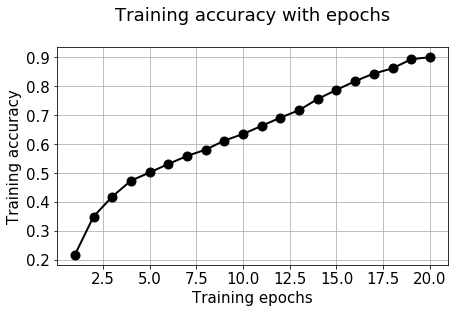

In [5]:
plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(n_epochs)],trained_model.history.history['acc'],'-o',c='k',lw=2,markersize=9)
plt.grid(True)
plt.title("Training accuracy with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training accuracy",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

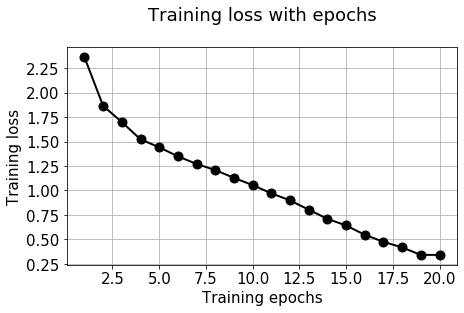

In [6]:
plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(n_epochs)],trained_model.history.history['loss'],'-o',c='k',lw=2,markersize=9)
plt.grid(True)
plt.title("Training loss with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training loss",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [7]:
# save model
trained_model.save("model.h5")
print("Saved model to disk")

Saved model to disk


In [13]:
# load model
trained_model = load_model('model.h5')

# test
counter = 0
for i in os.listdir("test_dataset"):
    img_path = 'test_dataset/' + i
    img_crab=Image.open(img_path)
    img_crab = img_crab.resize((200,200))

    # Expand dimensions for proper prediction
    img_crab=np.expand_dims(img_crab,axis=0)

    pred_class = classes[np.argmax(trained_model.predict(np.array(img_crab,dtype=np.float16)))]
    print(pred_class,"==>",i[:-4])
    
    if i[:-4] == pred_class:
        counter += 1
print(counter*100/90)

Coquelicot ==> Coquelicot
La verveine ==> La verveine
Menthe ==> Ortie
Thym ==> Thym


ValueError: Error when checking input: expected conv2d_input to have shape (200, 200, 3) but got array with shape (200, 200, 4)